# Path Wise Derivative / Reparameterization Trick

Similar to LRG, we want to minimize the following expectation

$$\underset{\phi}{\min} \mathbb{E}_{q_\phi (x)}[f(x)]$$

We need to compute the gradient of $\mathbb{E}_{q_\phi (x)}[f(x)]$ w.r.t
$\phi$. We cannot draw samples from $q_\phi$ and take the empirical mean

$$\frac{1}{K} \sum_{i=1}^K f(x^{(i)})$$

because this expression does not contain/depend on $\phi$. The gradient of
this expression w.r.t $\phi$ is 0.

Let $p_Z(z)$ be a simple distribution, e.g. Gaussian. Suppose that there exist
 a deterministic function $g: \mathcal{Z} \rightarrow \mathcal{X}$ with
 parameter $\phi$, s.t.

$$x = g_\phi(z)$$

Replace $x$ with $g_\phi(z)$

\begin{eqnarray}
\mathbb{E}_{x \sim q_\phi(x)} \left[ f(x) \right] & = & \mathbb{E}_{z \sim p_Z(z)} \left[ f(g_\phi(z)) \right] \\
& \approx & \frac{1}{K} \sum_{i = 1}^K f(g_\phi(z^{(i)}))
\end{eqnarray}

We can differentiate the new approximation w.r.t $\phi$ because it still
appears in the approximation.

Reparameterization trick usually has much lower variance than Likelihood Ratio Grad
because:
- Unlike LRG where the derivative is the derivative of $q_\phi$ w.r.t $\phi$,
the derivative here is of $f(x)$ w.r.t $\phi$. This makes the optimization
much easier (see example below).
- There is no $\log q_\phi(x)$ term. This term is very big for high
dimensional distributions and contribute significantly to the variance of LRG.

## Example

Consider again the problem in LRG.
Minimize the following loss function:

\begin{eqnarray}
\mathcal{L} = \mathbb{E}_{x \sim \mathcal{N}(\mu, I)} \left[\left\lvert\left\lvert x - \left[ \begin{matrix} 5 \\ 5 \end{matrix} \right] \right\rvert\right\rvert_2^2 \right]
\end{eqnarray}

We reparametrize $x$ by $\epsilon \sim \mathcal{N}(0, I)$ as follow
$x = \mu + \epsilon$. The loss function becomes

\begin{eqnarray}
\mathcal{L} & = & \mathbb{E}_{\epsilon \sim \mathcal{N}(0, I)} \left[
\left\lvert\left\lvert \mu + \epsilon - \left[ \begin{matrix} 5 \\ 5 \end{matrix} \right]
\right\rvert\right\rvert_2^2 \right] \\
& \approx & \frac{1}{K} \sum_{i = 1}^K \left\lvert\left\lvert \mu + \epsilon^{(i)} - \left[ \begin{matrix} 5 \\ 5 \end{matrix} \right]
\right\rvert\right\rvert_2^2
\end{eqnarray}

Taking the derivative of $\mathcal{L}$ w.r.t. $\mu$

\begin{eqnarray}
\nabla_\mu \mathcal{L} = \frac{2}{K} \sum_{i = 1}^K \left( \mu + \epsilon^{(i)} - \left[ \begin{matrix} 5 \\ 5 \end{matrix} \right] \right)
\end{eqnarray}

Unlike the gradient obtained in LRG, this gradient always push $\mu$ toward
the target $\left[5 \ 5\right]^\top$.

In [31]:
import numpy as np
from matplotlib import pyplot as plt

mu = np.array([0, 0])
target = np.array([5, 5])
I = np.array([[1, 0], [0, 1]])


In [32]:
def reparameterize_grad(z, mu, target):
    grad = 2 * (mu + z - target).mean(axis=0)
    # print('mu', mu)
    # print('target', target)
    # print('grad', grad)
    return grad

def loss(z, target):
    return (np.linalg.norm(z - target, axis=1) ** 2).mean()

def train(mu, target, loss, lr, n_train, n_test, n_iter=10, viz=False):
    for it in range(n_iter):

        z = np.random.multivariate_normal(mean=[0, 0], cov=I, size=n_train)
        pmu = mu
        gradi = reparameterize_grad(z, mu, target)
        mu = mu - lr * gradi

        # visualization
        if viz:
            fig, ax = plt.subplots(1, 1, figsize=(5, 5))
            ax.set_xlim(-5, 6)
            ax.set_ylim(-5, 6)
            ax.scatter(z[:, 0], z[:, 1], c='b')

            ax.scatter(pmu[0], pmu[1], c='r', s=80, alpha=0.5)
            ax.scatter(mu[0], mu[1], c='r', s=80)
            ax.arrow(pmu[0], pmu[1], mu[0] - pmu[0], mu[1] - pmu[1], head_width=0.1, length_includes_head=True)
            ax.scatter(target[0], target[1], c='g', s=80)

        z_test = np.random.multivariate_normal(mean=mu, cov=I, size=n_test)
        lossi = loss(z_test, target)
        print(it, lossi)

0 40.2381032578333
1 26.769962264149836
2 20.849450414590283
3 15.505076927819413
4 13.098078131095681
5 10.719453977296707
6 8.610907211523294
7 8.094697261064992
8 6.583447056914651
9 4.650406426539006
10 3.687512733551177
11 3.4793204649802294
12 2.9439114287343306
13 4.019273058936702
14 3.6218687620828827
15 2.774155195513396
16 1.8745424457456974
17 2.211797026824478
18 2.819343624925789
19 2.3009762181879214
20 2.6943203844368515
21 2.27511348254211
22 1.9953389721017387
23 2.0614223102441676
24 2.0172347362516185
25 2.3728761335588704
26 1.6592547615596234
27 2.317747841517134
28 2.6833503836844184
29 2.5042554398526544
30 2.073291606682665
31 2.2453223136114397
32 2.6821302191031315
33 2.4491423700521633
34 2.2487541244903144
35 2.4803528988834787
36 2.2209211442618515
37 2.2599707343132875
38 1.7857929358525682
39 1.6993654717084092
40 1.7001768071637509
41 2.1476305425711293
42 2.113343198120703
43 2.1817652109812866
44 2.0995473836935563
45 2.0326615572397175
46 2.167177898

<ipython-input-32-f9ac75b24c4b>:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=(5, 5))


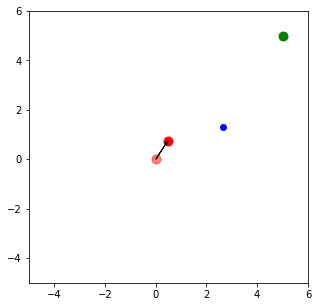

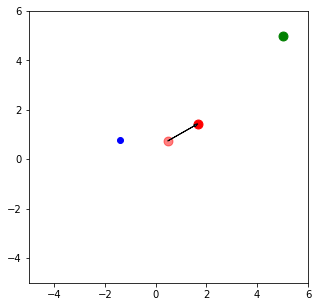

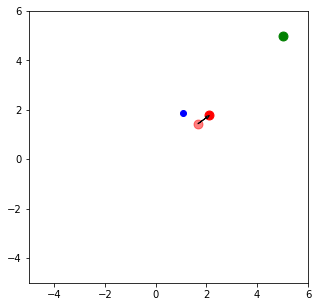

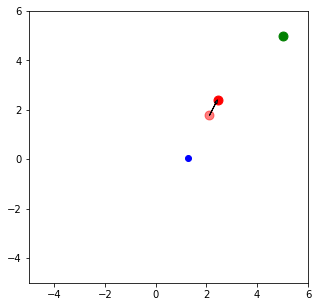

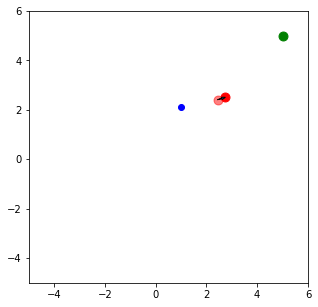

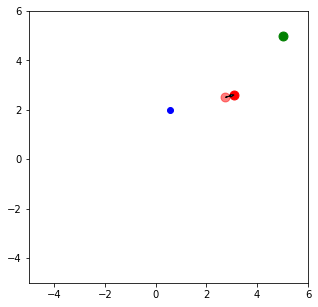

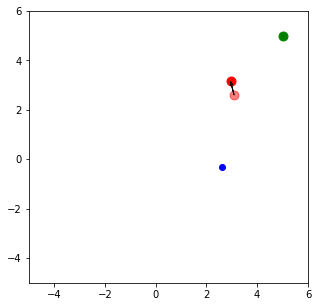

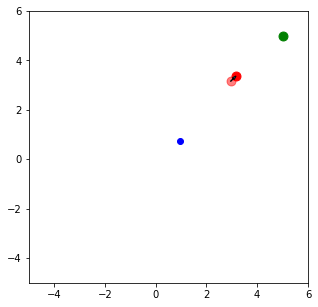

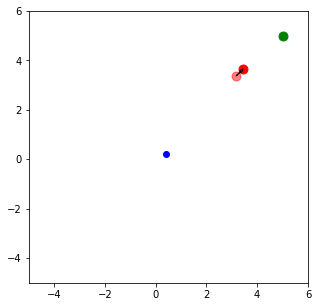

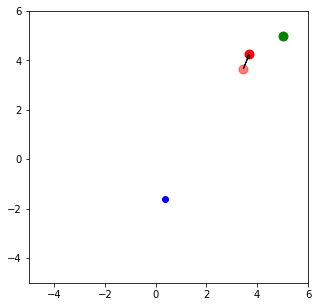

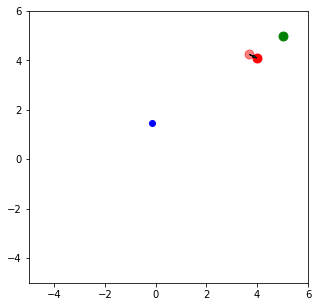

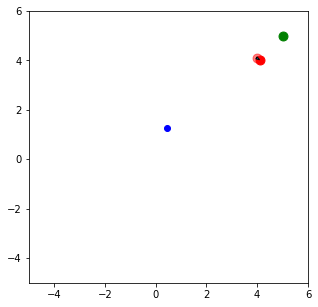

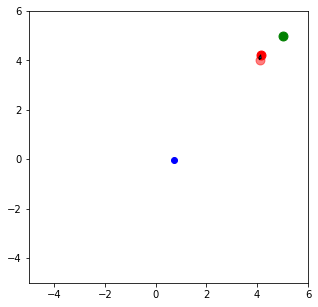

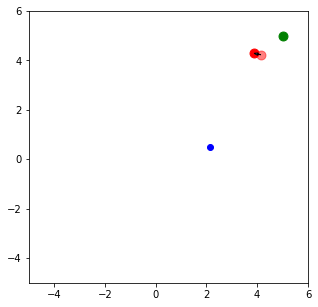

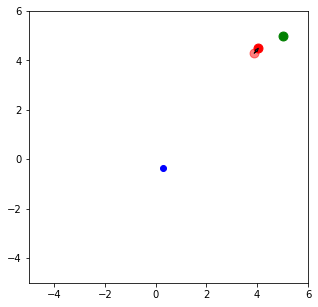

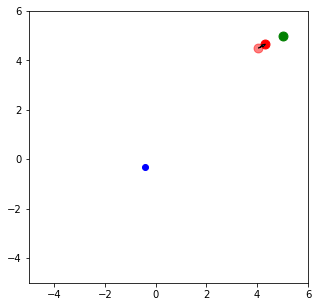

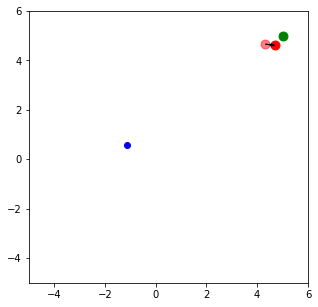

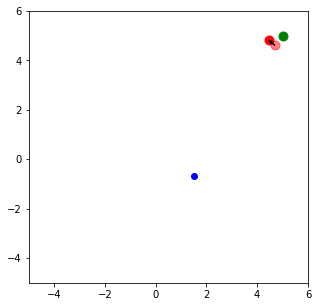

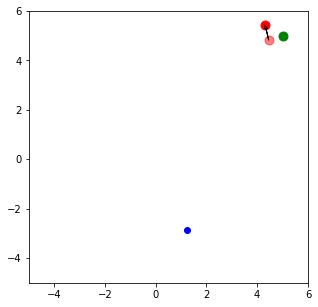

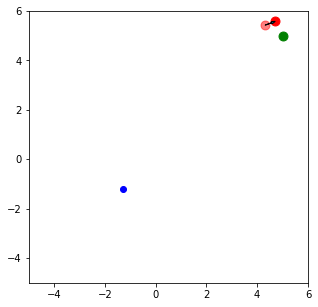

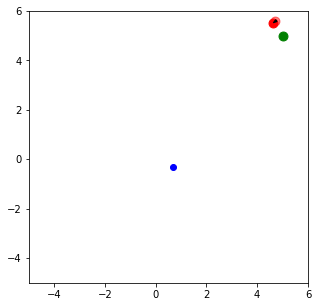

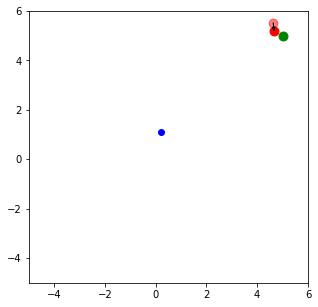

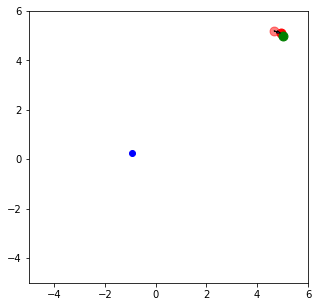

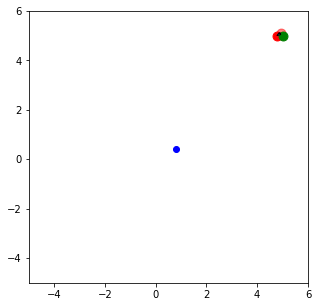

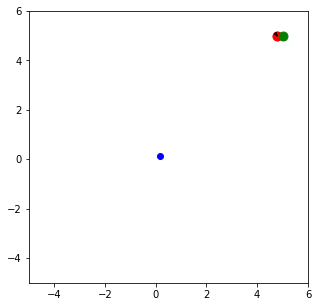

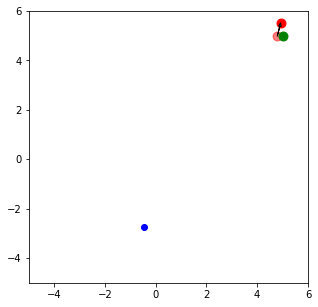

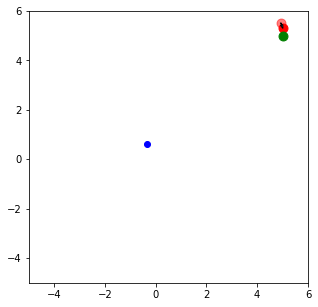

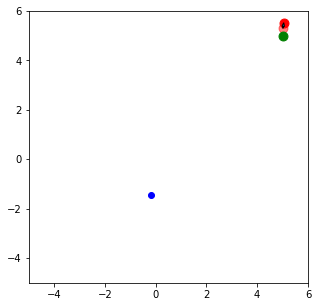

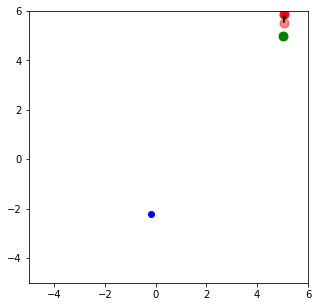

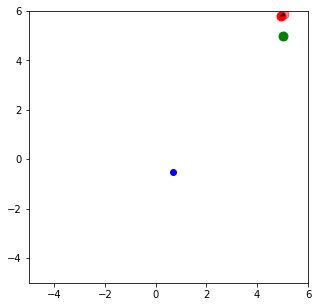

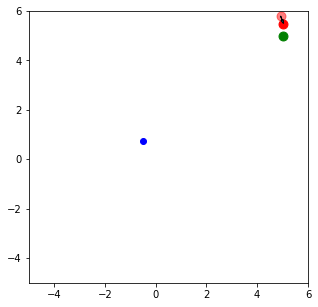

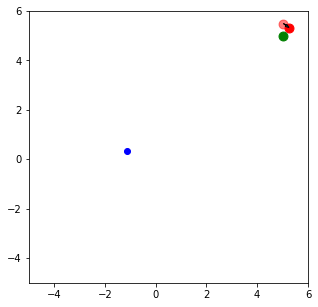

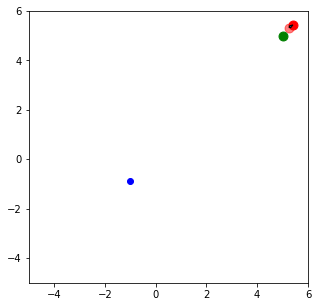

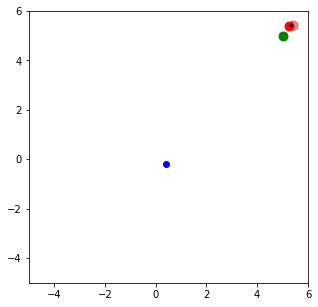

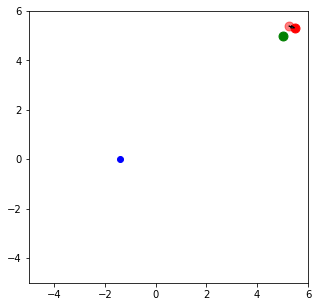

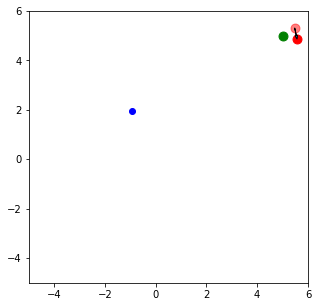

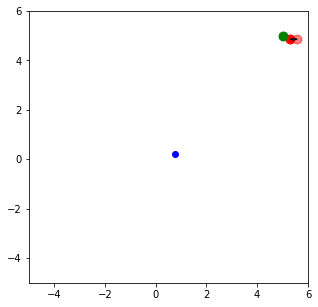

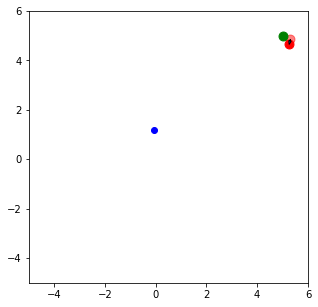

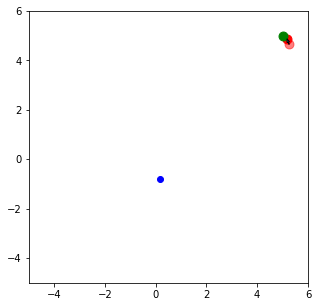

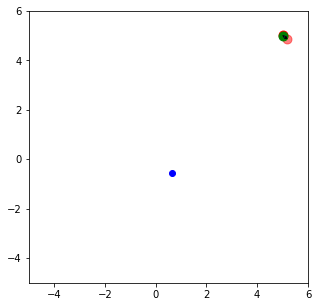

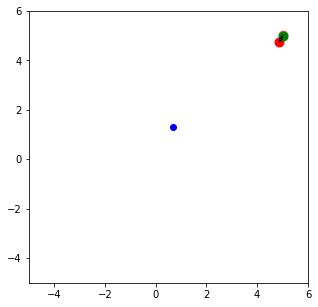

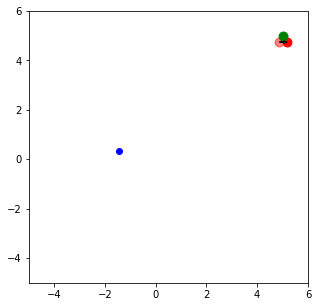

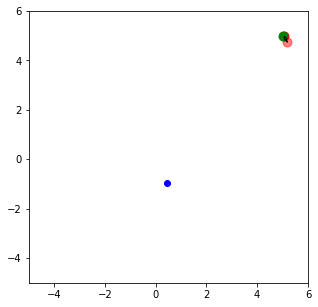

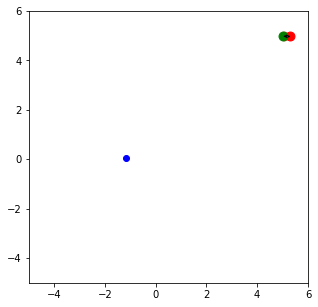

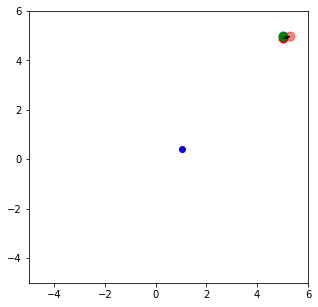

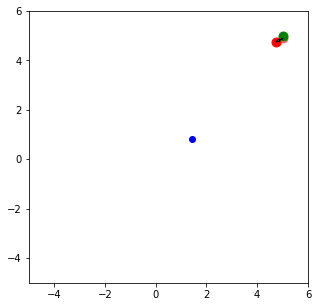

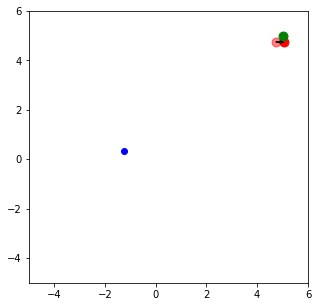

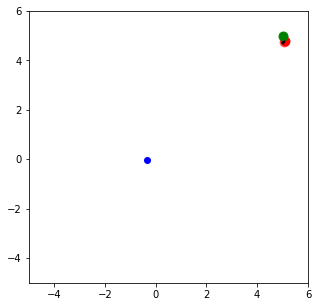

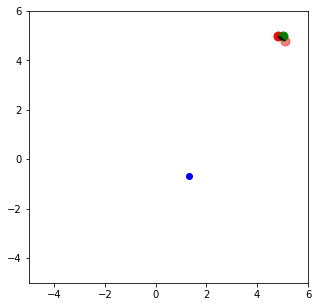

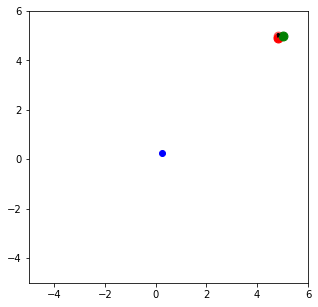

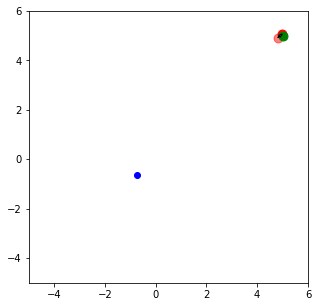

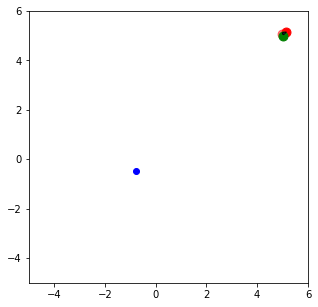

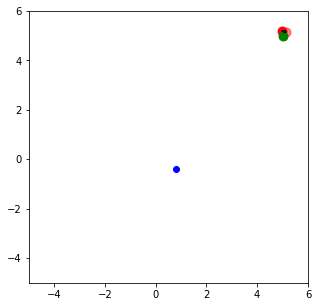

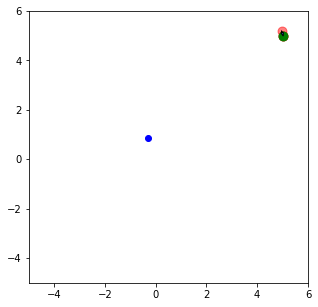

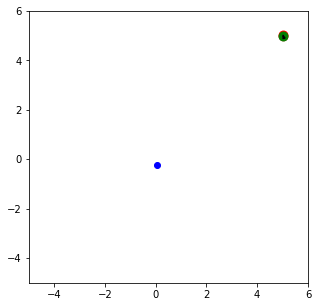

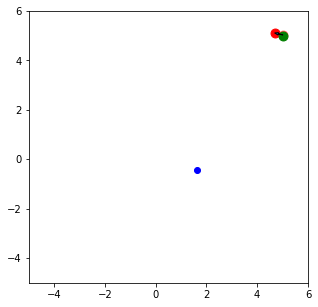

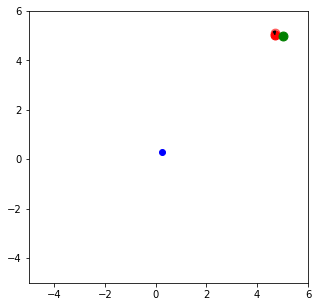

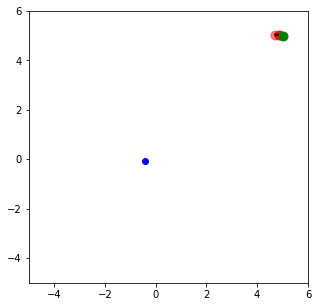

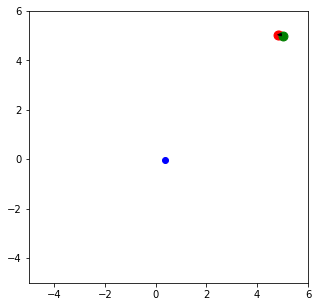

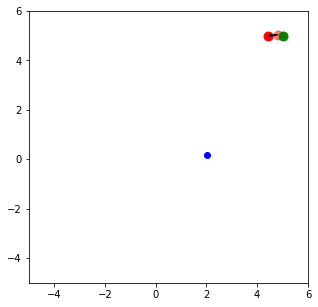

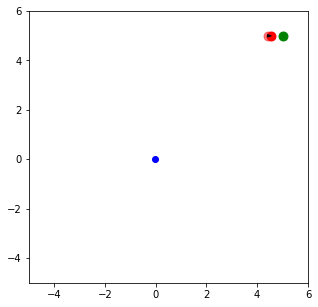

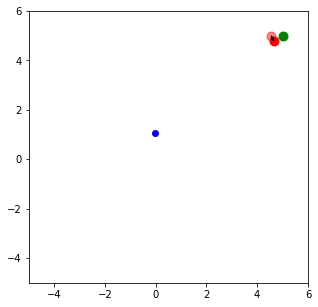

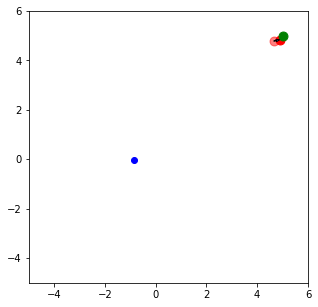

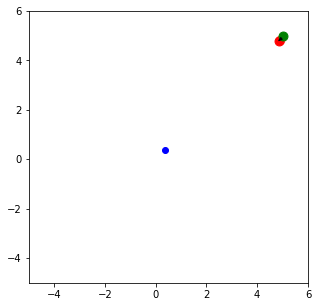

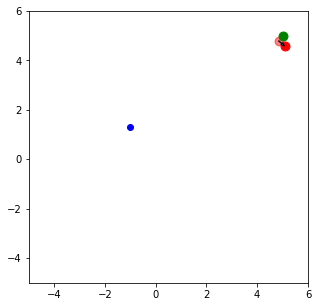

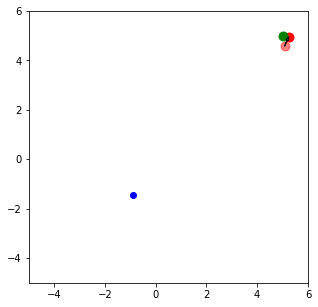

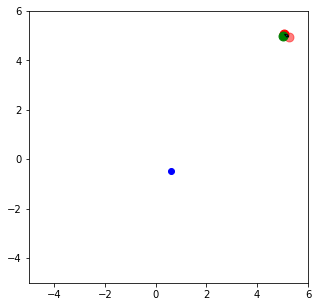

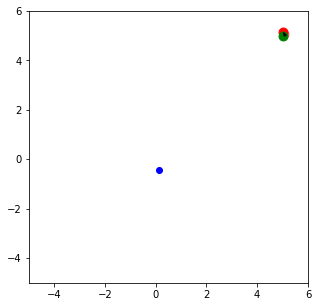

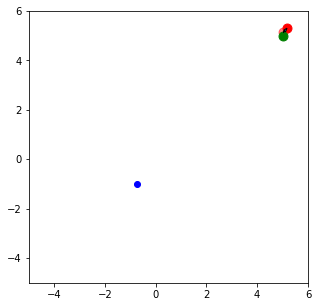

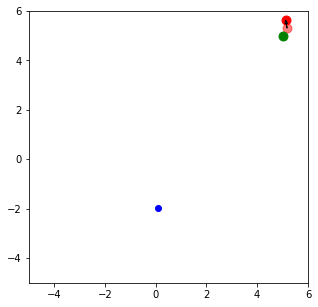

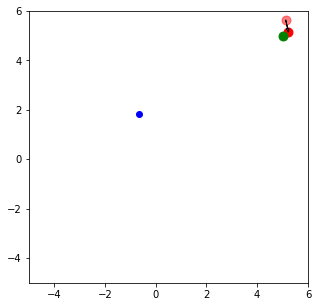

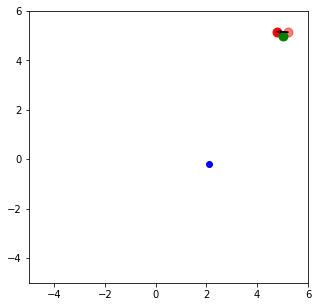

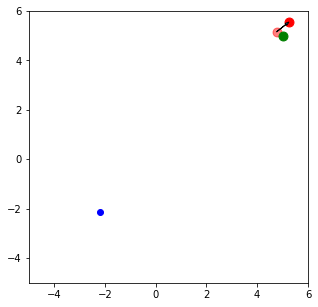

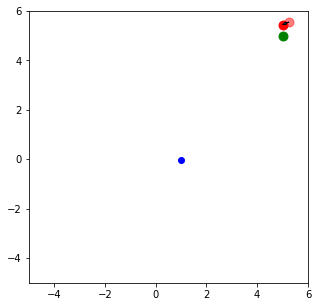

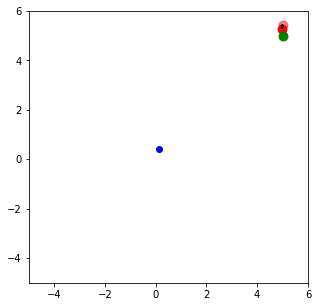

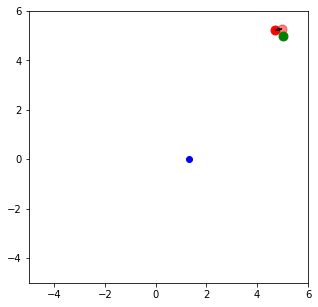

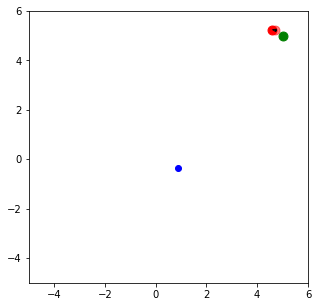

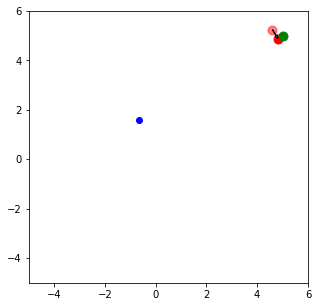

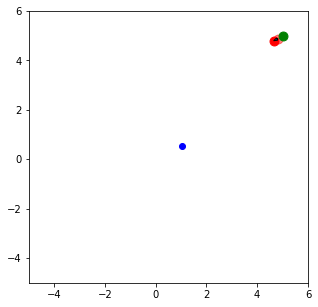

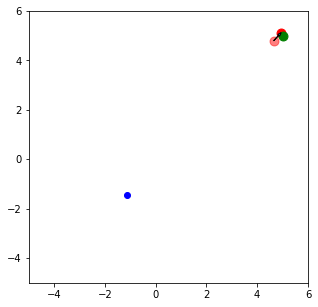

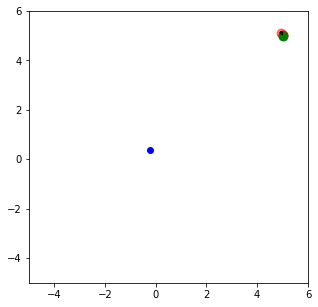

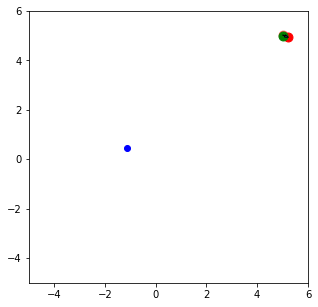

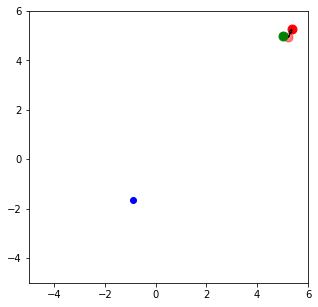

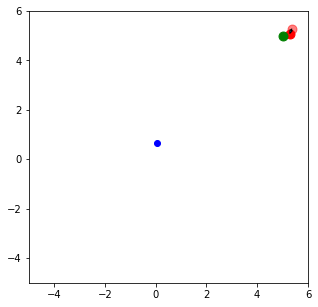

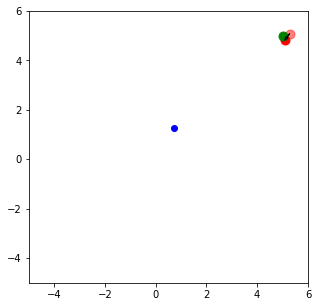

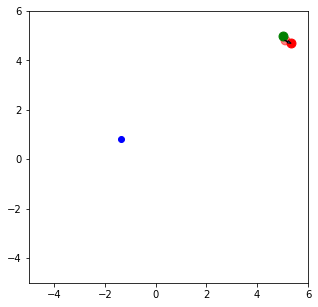

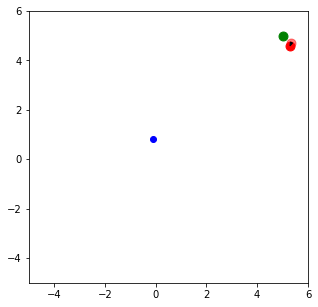

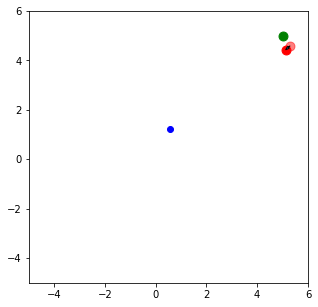

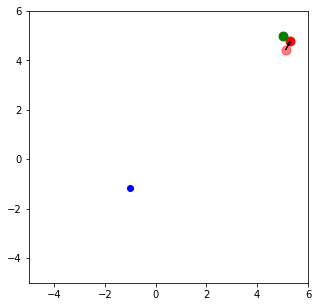

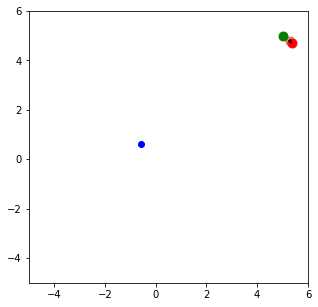

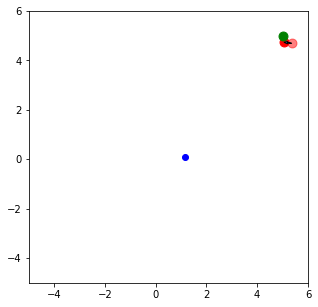

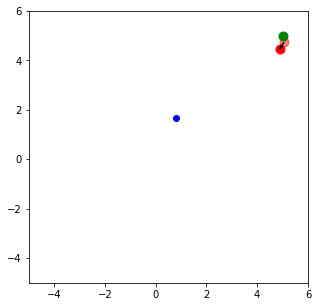

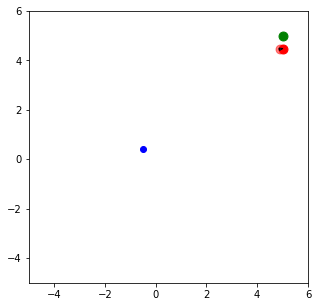

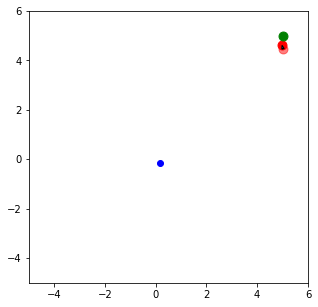

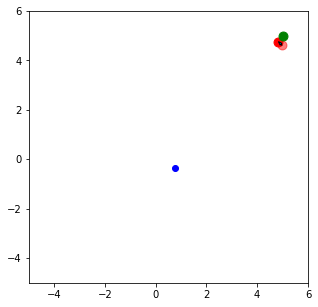

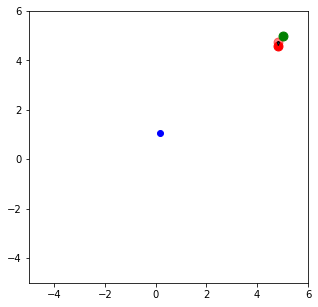

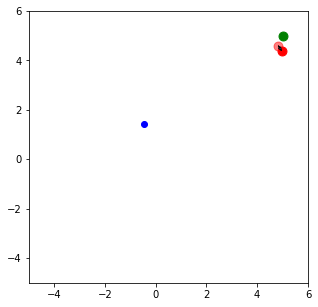

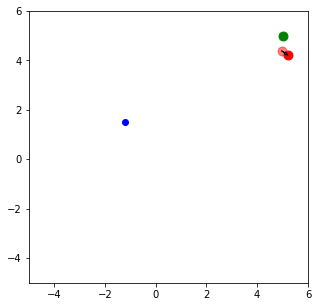

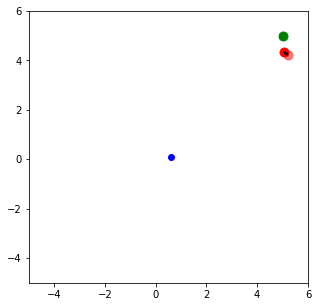

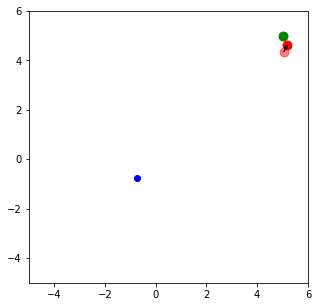

In [33]:
train(mu, target, loss, lr=0.1, n_train=1, n_test=100, n_iter=100, viz=True)